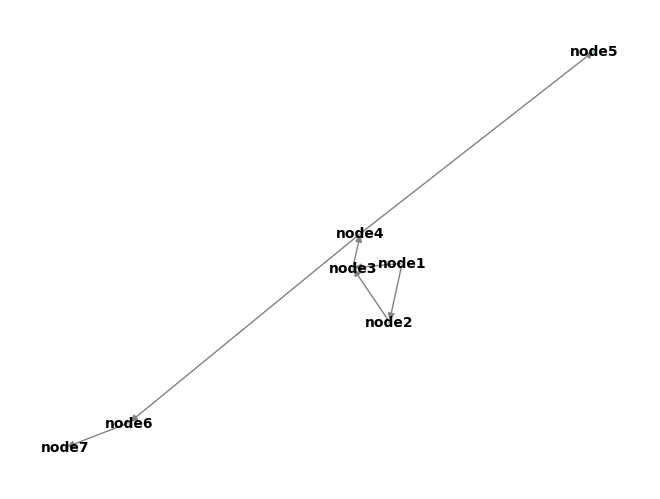

In [1]:
from observed_dict_rs import Node, Edge, Vertex
import networkx as nx

g = Vertex()

node1 = g.add_node('node1', {'value': 1})
node2 = g.add_node('node2', {'value': 2})
node3 = g.add_node('node3', {'value': 3})
node4 = g.add_node('node4', {'value': 4})
node5 = g.add_node('node5', {'value': 5})

edge1 = g.add_edge('node1', 'node2', {'weight': 1.0})
edge2 = g.add_edge('node2', 'node3', {'weight': 2.0})
edge3 = g.add_edge('node1', 'node3', {'weight': 3.0})
edge4 = g.add_edge('node3', 'node4', {'weight': 4.0})
edge5 = g.add_edge('node4', 'node5', {'weight': 4.0})

node6 = g.add_node('node6', {'value': 6})
edge6 = g.add_edge('node4', 'node6', {'weight': 4.0})
node7 = g.add_node('node7', {'value': 7})
edge7 = g.add_edge('node6', 'node7', {'weight': 4.0})

nx_graph1 = g.to_networkx()
nx.draw(nx_graph1, with_labels=True, pos=nx.spring_layout(nx_graph1), node_size=5, node_color='lightblue', font_size=10, font_color='black', font_weight='bold', edge_color='gray')

In [2]:
nx_graph1.edges

OutEdgeView([('node3', 'node4'), ('node2', 'node3'), ('node4', 'node5'), ('node4', 'node6'), ('node1', 'node2'), ('node1', 'node3'), ('node6', 'node7')])

In [3]:
g["node1"].edges

[unknown: node1 --> node2, unknown: node1 --> node3]

In [4]:
# Test direct path (node1 to node5)
direct_path = g.shortest_path_bfs('node1', 'node5')
print(f"Direct path from node1 to node2: {direct_path}")

Direct path from node1 to node2: Vertex(node4, node3, node5, node1)


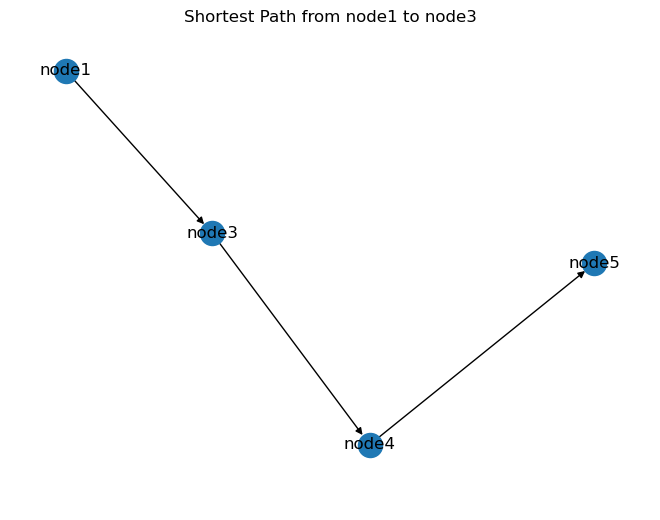

In [5]:
import networkx as nx

nx_graph2 = direct_path.to_networkx()
nx.draw(nx_graph2, with_labels=True)
import matplotlib.pyplot as plt
plt.title("Shortest Path from node1 to node3")
plt.show()

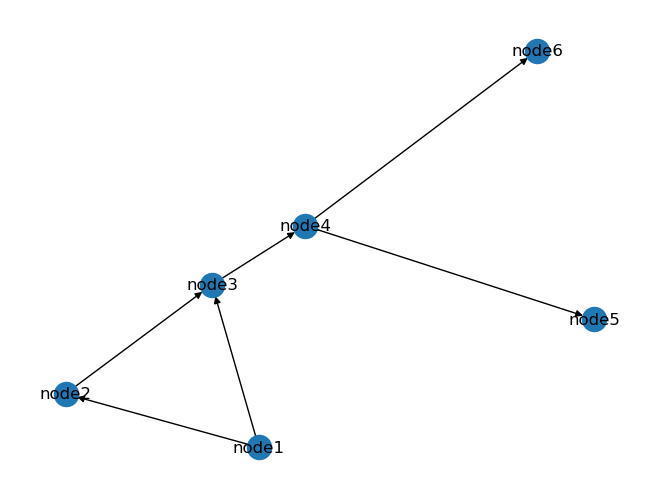

In [6]:

nx_graph3 = direct_path.expand(g, 1).to_networkx()

# plot
nx.draw(
    nx_graph3, 
    with_labels=True, 
    pos=nx.spring_layout(nx_graph3, iterations=10)
)

In [7]:
expanded = direct_path.expand(g, 1)

expanded.save_to_json("./example_graph.json")

reloaded_expanded = Vertex().load_from_json("./example_graph.json")

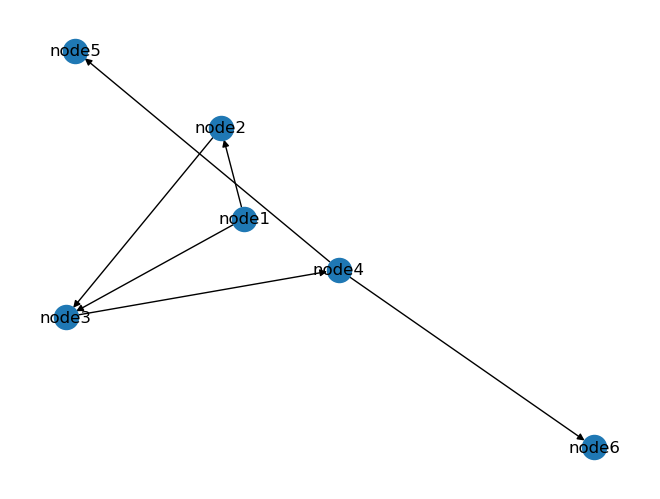

In [8]:
nx_graph4 = reloaded_expanded.to_networkx()
nx.draw(
    nx_graph4, 
    with_labels=True, 
    pos=nx.spring_layout(nx_graph3, iterations=10)
)

In [ ]:
v = Vertex()


# create a callback that allows self and node to be passed
def __callback(vertex, node):
    # FIXED: Need to reassign the entire meta dict for changes to persist
    if "visited_nodes" not in vertex.meta:
        vertex.meta["visited_nodes"] = []
    vertex.meta["visited_nodes"].append(node.id)
    return True  # Continue traversal


v.on_node_add_callbacks.append(__callback)
print(v.on_node_add_callbacks)

v.add_node('node1', {'value': 1})
v.add_node('node2', {'value': 2})
v.add_node('node3', {'value': 3})

print(v.meta)

[<function __callback at 0x7e84448b2de0>]
{'visited_nodes': ['node1', 'node2', 'node3']}


In [10]:
# Test the meta fields and NetworkX conversion
from observed_dict_rs import Node, Edge, Vertex
import networkx as nx

print("=== Testing Meta Fields ===")
g = Vertex()

# Test vertex meta
g.meta['graph_type'] = 'test_graph'
g.meta['created_by'] = 'user_test'
print(f"Vertex meta: {g.meta}")

# Add nodes with meta
node1 = g.add_node('node1', {'value': 1})
node1.meta['importance'] = 'high'
node1.meta['category'] = 'start'
print(f"Node1 meta: {node1.meta}")

node2 = g.add_node('node2', {'value': 2})
node2.meta['importance'] = 'medium'
node2.meta['category'] = 'middle'
print(f"Node2 meta: {node2.meta}")

# Add edge with meta
edge1 = g.add_edge('node1', 'node2', {'weight': 1.0})
edge1.meta['edge_type'] = 'strong'
edge1.meta['confidence'] = 0.95
print(f"Edge1 meta: {edge1.meta}")

print("\n=== Testing NetworkX Conversion ===")
nx_graph = g.to_networkx()
print(f"NetworkX nodes: {list(nx_graph.nodes())}")
print(f"NetworkX edges: {list(nx_graph.edges())}")
print(f"Node1 attributes in NetworkX: {nx_graph.nodes['node1']}")
print(f"Edge attributes in NetworkX: {nx_graph.edges['node1', 'node2']}")

print("\n=== Testing Serialization with Meta ===")
g.save_to_json('./test_meta.json')
reloaded_g = Vertex.load_from_json('./test_meta.json')
print(f"Reloaded vertex meta: {reloaded_g.meta}")
print(f"Reloaded node1 meta: {reloaded_g['node1'].meta}")
print(f"Reloaded edge1 meta: {reloaded_g['node1'].edges[0].meta}")

print("\n✅ All tests completed successfully!")

=== Testing Meta Fields ===
Vertex meta: {'graph_type': 'test_graph', 'created_by': 'user_test'}
Node1 meta: {}
Node2 meta: {}
Edge1 meta: {}

=== Testing NetworkX Conversion ===
NetworkX nodes: ['node1', 'node2']
NetworkX edges: [('node1', 'node2')]
Node1 attributes in NetworkX: {'value': 1}
Edge attributes in NetworkX: {'weight': 1.0}

=== Testing Serialization with Meta ===
Reloaded vertex meta: {'created_by': 'user_test', 'graph_type': 'test_graph'}
Reloaded node1 meta: {}
Reloaded edge1 meta: {}

✅ All tests completed successfully!


In [11]:
# Let's test a simpler callback first
print("Testing simpler callback...")

v = Vertex()
callback_executed = []

def simple_callback(vertex, node):
    print(f"Callback called with vertex and node {node.id}")
    callback_executed.append(node.id)
    return True

v.on_node_add_callbacks = [simple_callback]
print(f"Callbacks registered: {len(v.on_node_add_callbacks)}")

node1 = v.add_node('test1', {'value': 1})
print(f"Node created: {node1.id}")
print(f"Callback executions: {callback_executed}")

Testing simpler callback...
Callbacks registered: 1
Callback called with vertex and node test1
Node created: test1
Callback executions: ['test1']


In [12]:
# Test meta modification in callback
print("Testing meta modification in callback...")

v2 = Vertex()
print(f"Initial meta: {v2.meta}")

def meta_callback(vertex, node):
    print(f"Before modification - vertex.meta: {vertex.meta}")
    vertex.meta["visited_nodes"] = [node.id]
    print(f"After modification - vertex.meta: {vertex.meta}")
    return True

v2.on_node_add_callbacks = [meta_callback]

node1 = v2.add_node('test1', {'value': 1})
print(f"Final meta after add_node: {v2.meta}")

# Test direct meta access
print("\nTesting direct meta access:")
v2.meta["direct_test"] = "works"
print(f"After direct assignment: {v2.meta}")

Testing meta modification in callback...
Initial meta: {}
Before modification - vertex.meta: {}
After modification - vertex.meta: {'visited_nodes': ['test1']}
Final meta after add_node: {'visited_nodes': ['test1']}

Testing direct meta access:
After direct assignment: {'visited_nodes': ['test1'], 'direct_test': 'works'}


In [13]:
# Test accessing meta field directly
print("Testing meta field access patterns...")

v3 = Vertex()
print(f"Type of v3.meta: {type(v3.meta)}")
print(f"v3.meta: {v3.meta}")

# Check if meta behaves like a normal dict
print(f"Meta keys: {list(v3.meta.keys())}")

# Try setting and getting
v3.meta['test'] = 'value'
print(f"After setting test='value': {v3.meta}")
print(f"Getting test: {v3.meta.get('test', 'NOT_FOUND')}")

# Check if it's the same object
meta_ref = v3.meta
meta_ref['test2'] = 'value2'
print(f"After modifying via reference: {v3.meta}")

# Check if we need to reassign
temp_meta = dict(v3.meta)
temp_meta['test3'] = 'value3'
v3.meta = temp_meta
print(f"After reassigning: {v3.meta}")

Testing meta field access patterns...
Type of v3.meta: <class 'dict'>
v3.meta: {}
Meta keys: []
After setting test='value': {'test': 'value'}
Getting test: value
After modifying via reference: {'test': 'value', 'test2': 'value2'}
After reassigning: {'test': 'value', 'test2': 'value2', 'test3': 'value3'}


In [14]:
# Fixed version of the callback that works with meta
print("Testing FIXED callback...")

v4 = Vertex()

def working_callback(vertex, node):
    # Get current meta, modify it, then reassign
    current_meta = dict(vertex.meta)  # Get copy of current meta
    
    # Initialize visited_nodes if it doesn't exist, or append to it
    if "visited_nodes" not in current_meta:
        current_meta["visited_nodes"] = []
    current_meta["visited_nodes"].append(node.id)
    
    # Reassign the entire meta dictionary (this triggers the setter)
    vertex.meta = current_meta
    print(f"Callback processed {node.id}, meta now: {vertex.meta}")
    return True

v4.on_node_add_callbacks = [working_callback]

print("Adding nodes...")
v4.add_node('node1', {'value': 1})
v4.add_node('node2', {'value': 2})
v4.add_node('node3', {'value': 3})

print(f"Final meta: {v4.meta}")
print(f"Visited nodes: {v4.meta.get('visited_nodes', 'NOT_FOUND')}")

# Alternative approach - overwrite each time (like original code)
print("\n--- Alternative: overwrite each time ---")
v5 = Vertex()

def overwrite_callback(vertex, node):
    # Overwrite visited_nodes each time (like original code intention)
    vertex.meta = {"visited_nodes": [node.id]}
    return True

v5.on_node_add_callbacks = [overwrite_callback]
v5.add_node('node1', {'value': 1})
v5.add_node('node2', {'value': 2})
v5.add_node('node3', {'value': 3})

print(f"Overwrite approach meta: {v5.meta}")

Testing FIXED callback...
Adding nodes...
Callback processed node1, meta now: {'visited_nodes': ['node1']}
Callback processed node2, meta now: {'visited_nodes': ['node1', 'node2']}
Callback processed node3, meta now: {'visited_nodes': ['node1', 'node2', 'node3']}
Final meta: {'visited_nodes': ['node1', 'node2', 'node3']}
Visited nodes: ['node1', 'node2', 'node3']

--- Alternative: overwrite each time ---
Overwrite approach meta: {'visited_nodes': ['node3']}


In [15]:
# =============================================================================
# COMPREHENSIVE GUIDE: Working with Meta in Callbacks
# =============================================================================

print("📚 Guide: Proper Meta Callback Patterns")
print("=" * 50)

# Pattern 1: Accumulating values (append to list)
print("\n1️⃣ Pattern 1: Accumulating visited nodes")
v1 = Vertex()

def accumulating_callback(vertex, node):
    """Accumulate all visited nodes in a list"""
    current_meta = dict(vertex.meta)  # Get current meta
    if "visited_nodes" not in current_meta:
        current_meta["visited_nodes"] = []
    current_meta["visited_nodes"].append(node.id)
    vertex.meta = current_meta  # Reassign to trigger setter
    return True

v1.on_node_add_callbacks = [accumulating_callback]
v1.add_node('A', {'value': 1})
v1.add_node('B', {'value': 2})
v1.add_node('C', {'value': 3})
print(f"Result: {v1.meta}")

📚 Guide: Proper Meta Callback Patterns

1️⃣ Pattern 1: Accumulating visited nodes
Result: {'visited_nodes': ['A', 'B', 'C']}
